In [1]:
import pickle
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import umap 

with open('Data/trainingData.pkl', 'rb') as f:
    data = pickle.load(f)
    classes = pickle.load(f)

data.head()

,LABEL,COORDS
0,0,"[-0.04144144144144144, 0.3368888888888889, 0.0..."
1,0,"[-0.04684684684684685, 0.33955555555555555, 0...."
2,0,"[-0.04684684684684685, 0.33955555555555555, 0...."
3,0,"[-0.04504504504504504, 0.33866666666666667, 0...."
4,0,"[-0.04504504504504504, 0.33866666666666667, 0...."


In [2]:
data['LABEL'] = data['LABEL'].replace({v: k for k, v in classes.items()})
data.head()

,LABEL,COORDS
0,Tu,"[-0.04144144144144144, 0.3368888888888889, 0.0..."
1,Tu,"[-0.04684684684684685, 0.33955555555555555, 0...."
2,Tu,"[-0.04684684684684685, 0.33955555555555555, 0...."
3,Tu,"[-0.04504504504504504, 0.33866666666666667, 0...."
4,Tu,"[-0.04504504504504504, 0.33866666666666667, 0...."


In [3]:
def showPCA(data, labelA, labelB):
    tempData = data[data['LABEL'].isin([labelA, labelB])]
    coords = np.array(tempData['COORDS'].tolist())

    pca = PCA(n_components=2) 
    principalComponents = pca.fit_transform(coords)

    pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    pca_df['LABEL'] = tempData['LABEL'].values

    colors = {labelA: 'green', labelB: 'blue'}
    pca_df['Color'] = pca_df['LABEL'].map(colors)

    plt.figure(figsize=(5, 5))
    for label, color in colors.items():
        subset = pca_df[pca_df['LABEL'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], alpha=0.5, label=label, color=color)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of the data')
    plt.legend()
    plt.show()

def showUMAP(data, labelA, labelB):
    tempData = data[data['LABEL'].isin([labelA, labelB])]
    coords = np.array(tempData['COORDS'].tolist())

    reducer = umap.UMAP()
    embedding = reducer.fit_transform(coords)

    umap_df = pd.DataFrame(data=embedding, columns=['UMAP1', 'UMAP2'])
    umap_df['LABEL'] = tempData['LABEL'].values

    colors = {labelA: 'green', labelB: 'blue'}
    umap_df['Color'] = umap_df['LABEL'].map(colors)

    plt.figure(figsize=(5, 5))
    for label, color in colors.items():
        subset = umap_df[umap_df['LABEL'] == label]
        plt.scatter(subset['UMAP1'], subset['UMAP2'], alpha=0.5, label=label, color=color)

    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title('UMAP of the data')
    plt.legend()
    plt.show()

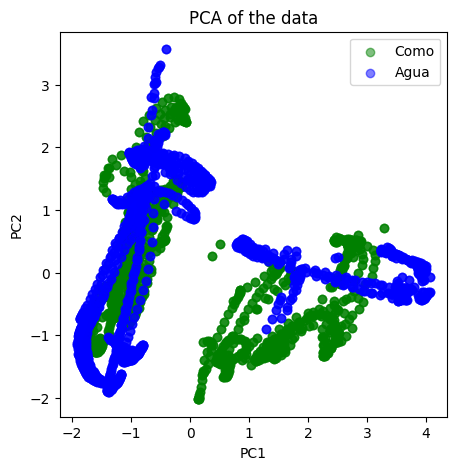

In [4]:
showPCA(data, "Como", "Agua")

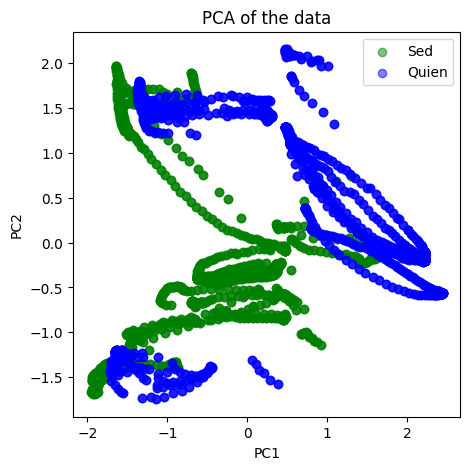

In [5]:
showPCA(data, "Sed", "Quien")

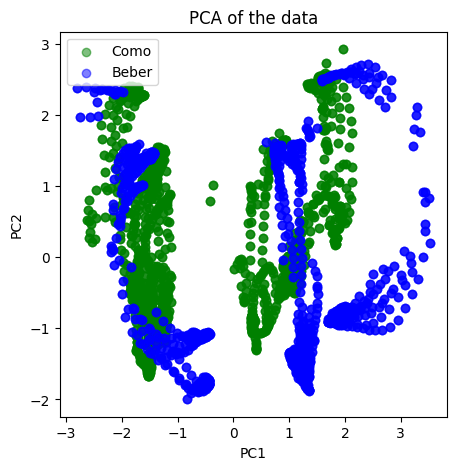

In [6]:
showPCA(data, "Como", "Beber")

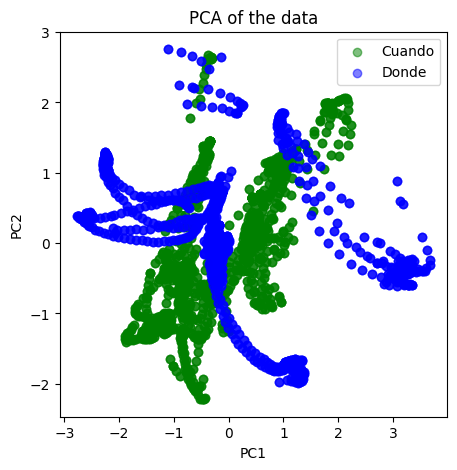

In [7]:
showPCA(data, "Cuando", "Donde")

In [ ]:
showPCA(data, "Como", "Donde")

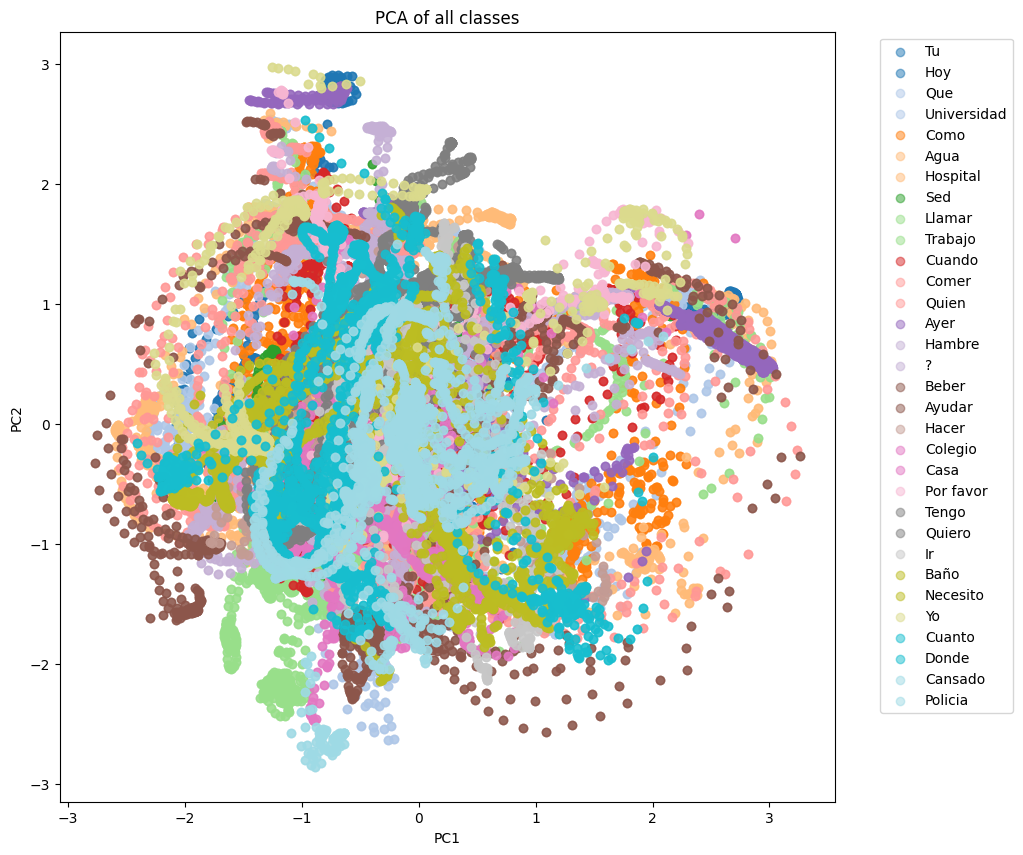

In [10]:
def showPCAAllClasses(data):
    coords = np.array(data['COORDS'].tolist())

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(coords)

    pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
    pca_df['LABEL'] = data['LABEL'].values
    pca_df = pca_df[~pca_df['LABEL'].str.contains('_INV_')]

    unique_labels = pca_df['LABEL'].unique()
    colors = plt.cm.get_cmap('tab20', len(unique_labels))

    plt.figure(figsize=(10, 10))
    for i, label in enumerate(unique_labels):
        subset = pca_df[pca_df['LABEL'] == label]
        plt.scatter(subset['PC1'], subset['PC2'], alpha=0.5, label=label, color=colors(i))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of all classes')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

showPCAAllClasses(data)